In [1]:
#here i am loading all imp packages 
import numpy as np
from tensorflow.keras import layers, models, callbacks
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#load my dataset
(train_images,train_labels),(test_images,test_labels) =  tf.keras.datasets.mnist.load_data()

In [5]:
#0-255   Normalization   0-1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# train_images[0].ndim

In [9]:
#Reshpe -> 1
train_images = train_images.reshape((-1,28,28,1)) #do as is
test_images = test_images.reshape((-1,28,28,1))

In [10]:
# test_images[0]

In [11]:
#one hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)  

In [13]:
#data augumentation  - practical -> 

data_augumentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),      #10% turn left right -> radians
    layers.RandomZoom(0.1)
])

In [18]:
#Dfine the arch of cnn based my requiremtn - why?  code resuability

def create_model():
    model = models.Sequential([
        #extra layer fot seperate input 
        layers.Input(shape=(28,28,1)),  #l*w(channel)
        data_augumentation,
        #layer-1
        layers.Conv2D(32,(3,3),activation='relu'),    #non linearity  #,input_shape=(28,28,1)
        layers.BatchNormalization(),   #this makes my layer
        layers.MaxPooling2D((2,2)),
        #layer-2
        layers.Conv2D(64,(3,3),activation='relu'),    #non linearity
        layers.BatchNormalization(),   #this makes my layer
        layers.MaxPooling2D((2,2)),
        #layer-3
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.BatchNormalization(),
        
        #layer-4
        layers.Flatten(input_shape=(28,28,1)),
        
        #layer-5 - ANN
        layers.Dense(128,activation='relu'),   #randomly
        layers.Dropout(0.5),
        layers.Dense(10,activation='softmax')   #relu?   -> 0,1,2,3,4,5,6,7,8,9  
    ])
    return model

In [19]:
#create model
model = create_model()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics =['accuracy'])

/Users/parthsharma/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
#very very - no    callbacks -  
early_stopping = callbacks.EarlyStopping(patience=5,restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.2,patience=3)

In [21]:
#train my model
history = model.fit(train_images, train_labels,epochs=30,
                   validation_split=0.1,
                   callbacks=[early_stopping,reduce_lr])

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.8548 - loss: 0.4603 - val_accuracy: 0.9820 - val_loss: 0.0625 - learning_rate: 0.0010
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9643 - loss: 0.1234 - val_accuracy: 0.9867 - val_loss: 0.0477 - learning_rate: 0.0010
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9707 - loss: 0.0959 - val_accuracy: 0.9855 - val_loss: 0.0491 - learning_rate: 0.0010
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9752 - loss: 0.0849 - val_accuracy: 0.9877 - val_loss: 0.0496 - learning_rate: 0.0010
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9777 - loss: 0.0773 - val_accuracy: 0.9893 - val_loss: 0.0461 - learning_rate: 0.0010
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9808 - loss: 0.0681 - val_accuracy: 0.9795 - val_loss: 0.0764 - learning_rate: 0.0010
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accura

In [22]:
#evaluate the model
test_loss,  test_acc = model.evaluate(test_images, test_labels, verbose=1)
print(f"\nTest Accuracy : {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - loss: 0.0327

Test Accuracy : 0.9927999973297119


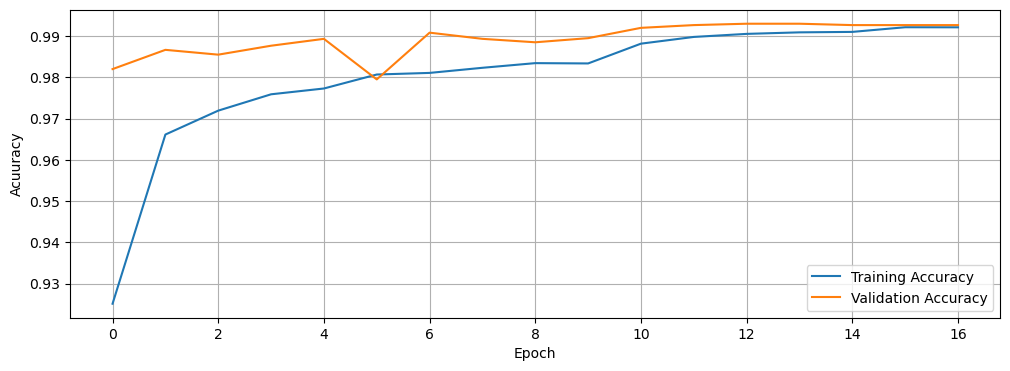

In [24]:
#plot
plt.figure(figsize=(12,4))
# plt.subplots(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Acuuracy")
plt.legend()
plt.grid(True)

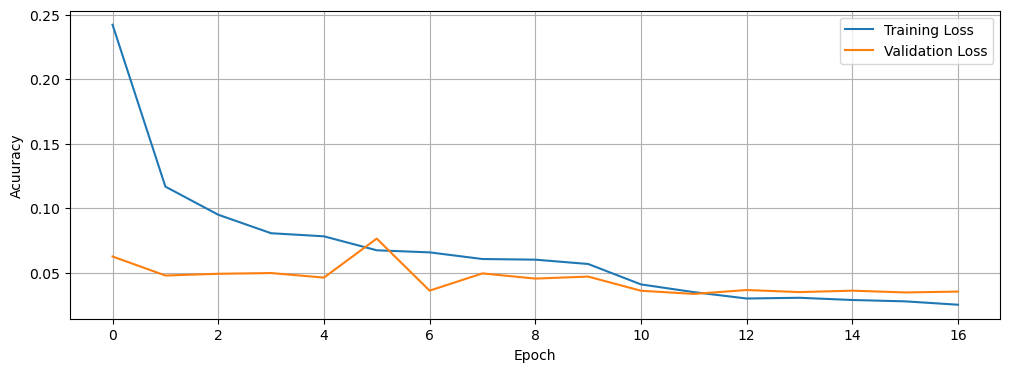

In [25]:
#plot
plt.figure(figsize=(12,4))
# plt.subplots(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Acuuracy")
plt.legend()
plt.grid(True)

In [26]:
model.save("minst_cnn_model.keras")  #mnist
print(f"Model is saved successfully!")

Model is saved successfully!


In [31]:
from PIL import Image, ImageOps
#oop
def predict_image(image_path, model):
    img = Image.open(image_path).convert("L")    #loaded the image in 1 channel - gray scale
    img = ImageOps.invert(img)                   # inverted image - 0-lohjt- 255 dark
    img = img.resize((28,28))                    #rezingin 28,28 - downsmaplinhg
    img_array = np.array(img)                          # comnvrt numpy array
    img_array = img_array.astype('float32')/255  #normalzied
    img_array = img_array.reshape((1,28,28,1))
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    
    return predicted_class,confidence

In [32]:
def load_model_and_predict(image_path):
    loaded_model = tf.keras.models.load_model('minst_cnn_model.keras')
    predicted_class, confidence = predict_image(image_path,loaded_model)
    print(f"Predicted class : {predicted_class}")
    print(f"Confidence : {confidence}")
    
    #show the image
    img = Image.open(image_path).convert("L")
    plt.imshow(img,cmap='gray')
    plt.title(f"Predicted : {predicted_class}\nConfidence :{confidence}")
    plt.axis('off')
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class : 8
Confidence : 0.7168400883674622


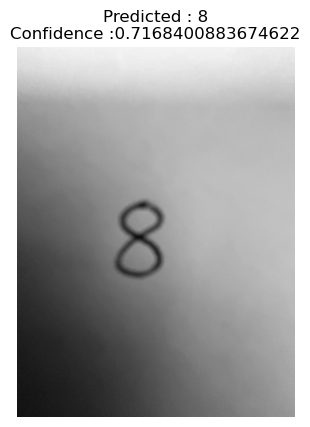

In [35]:
load_model_and_predict("./IMG_0580.jpg")